In [1]:
import vvp_project_support as sup

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix

In [2]:
def create_path_matrix(maze, path):
    # Vytvoření matice nul stejného rozměru jako matice s bludištěm
    path_matrix = np.zeros(maze.shape)

    # Projděte cestu a přidejte hrany mezi sousedními uzly
    for i in range(len(path)-1):
        current = path[i]
        next_node = path[i+1]
        path_matrix[current[0], current[1]] = 1
        path_matrix[next_node[0], next_node[1]] = 1

    # Nastavte hodnotu 1 pro průchozí uzly (bunky na cestě), 0 jinak
    path_matrix[maze] = path_matrix[maze].astype(int)

    return path_matrix

In [8]:
def dijkstra(inc_mat,maze):
    n,m = np.shape(inc_mat)

    result = np.zeros((2,n*n))
    result[1,:] = np.ones(n*n)*n*n #distance
    result[1,0] = 0
    unvisited = [i for i in range(n*n)]
    connection = []
    for j in range(m):
        col_slice = inc_mat[:,j]
        idx = [q for q, x in enumerate(col_slice) if x == 1]
        connection.append(idx)
    
    while(unvisited[-1] == n*n-1):

        dst = n*n
        idx = 0
        for i in unvisited:
            if result[1,i] < dst:
                dst = result[1,i]
                idx = i
        g_idx = get_idx(idx,connection)
        unvisited.remove(idx)
        

def get_idx(idx, connection):
    gen = [c for c in connection if c[0] == idx  or c[1] == idx]
    gen = [c[1] if c[0] == idx else c[0] for c in gen]
    return gen





maze = sup.load_document('data/maze_0.csv')
inc = sup.incidence_matrix(maze)
print(inc)
dijkstra(inc,maze)
#sup.draw_nx_graph(inc)

[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]


ValueError: list.remove(x): x not in list

160


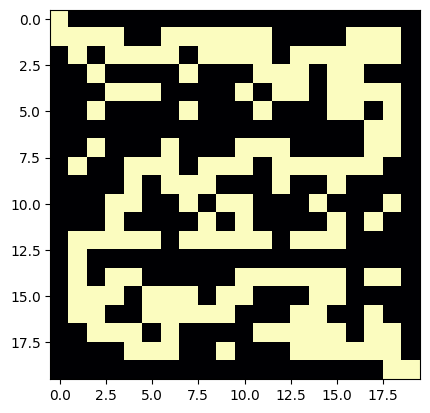

In [19]:
maze = sup.load_document('data/maze_2.csv')
n_nodes = np.sum(~maze)
print(n_nodes)
plt.imshow(maze, cmap='magma_r')
plt.show()